## Objectives : Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’.

# Step 1 : Import Libraries

In [43]:
import numpy as np
import pandas as pd 
import os
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import matplotlib.pyplot as plt 
from PIL import  Image
import seaborn as sns 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

# Step 2 : Data Import

In [44]:
data = pd.read_csv(r"C:\Users\akash\OneDrive\Desktop\Python\Machine Learning---- Python\Projects\HR-Employee-Attrition.csv")
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion
0,41,Yes,Travel_Rarely,1102,Sales,1,Life Sciences,2,Female,94,...,4,Single,5993,19479,Yes,11,3,8,6,0
1,49,No,Travel_Frequently,279,Research & Development,8,Life Sciences,3,Male,61,...,2,Married,5130,24907,No,23,4,10,10,1
2,37,Yes,Travel_Rarely,1373,Research & Development,2,Other,4,Male,92,...,3,Single,2090,2396,Yes,15,3,7,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Life Sciences,4,Female,56,...,3,Married,2909,23159,Yes,11,3,8,8,3
4,27,No,Travel_Rarely,591,Research & Development,2,Medical,1,Male,40,...,2,Married,3468,16632,No,12,3,6,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,Medical,3,Male,41,...,4,Married,2571,12290,No,17,3,17,5,0
1466,39,No,Travel_Rarely,613,Research & Development,6,Medical,4,Male,42,...,1,Married,9991,21457,No,15,3,9,7,1
1467,27,No,Travel_Rarely,155,Research & Development,4,Life Sciences,2,Male,87,...,2,Married,6142,5174,Yes,20,4,6,6,0
1468,49,No,Travel_Frequently,1023,Sales,2,Medical,4,Male,63,...,2,Married,5390,13243,No,14,3,17,9,0


# Step 3 : Data Pre-Processing
* Data Type and conversion.
* Identifying & Treatment Missing Values.
* Identifying & Treatment of Outliers.

### Data Type and conversion

In [45]:
# Checking The Information Of The Given Dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   BusinessTravel           1470 non-null   object
 3   DailyRate                1470 non-null   int64 
 4   Department               1470 non-null   object
 5   DistanceFromHome         1470 non-null   int64 
 6   EducationField           1470 non-null   object
 7   EnvironmentSatisfaction  1470 non-null   int64 
 8   Gender                   1470 non-null   object
 9   HourlyRate               1470 non-null   int64 
 10  JobRole                  1470 non-null   object
 11  JobSatisfaction          1470 non-null   int64 
 12  MaritalStatus            1470 non-null   object
 13  MonthlyIncome            1470 non-null   int64 
 14  MonthlyRate              1470 non-null  

### Univariate Analysis

In [46]:
# Statistical Analysis Of Dataset
data.describe()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobSatisfaction,MonthlyIncome,MonthlyRate,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.721769,65.891156,2.728571,6502.931293,14313.103401,15.209524,3.153741,11.279592,7.008163,2.187755
std,9.135373,403.509100,8.106864,1.093082,20.329428,1.102846,4707.956783,7117.786044,3.659938,0.360824,7.780782,6.126525,3.222430
min,18.000000,102.000000,1.000000,1.000000,30.000000,1.000000,1009.000000,2094.000000,11.000000,3.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,48.000000,2.000000,2911.000000,8047.000000,12.000000,3.000000,6.000000,3.000000,0.000000
50%,36.000000,802.000000,7.000000,3.000000,66.000000,3.000000,4919.000000,14235.500000,14.000000,3.000000,10.000000,5.000000,1.000000
75%,43.000000,1157.000000,14.000000,4.000000,83.750000,4.000000,8379.000000,20461.500000,18.000000,3.000000,15.000000,9.000000,3.000000
max,60.000000,1499.000000,29.000000,4.000000,100.000000,4.000000,19999.000000,26999.000000,25.000000,4.000000,40.000000,40.000000,15.000000


In [47]:
# Checking Number Of Rows And Columns.
data.shape

(1470, 21)

#### In Dataset There Are 1470 Rows And 35 Columns Are Present.

In [48]:
# Checking Number Of Missing Values.
data.isna().sum()

Age                        0
Attrition                  0
BusinessTravel             0
DailyRate                  0
Department                 0
DistanceFromHome           0
EducationField             0
EnvironmentSatisfaction    0
Gender                     0
HourlyRate                 0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
MonthlyRate                0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
TotalWorkingYears          0
YearsAtCompany             0
YearsSinceLastPromotion    0
dtype: int64

#### There Is No Any Missing Values In Data.

### Identifying & Treatment of Outliers

<AxesSubplot:>

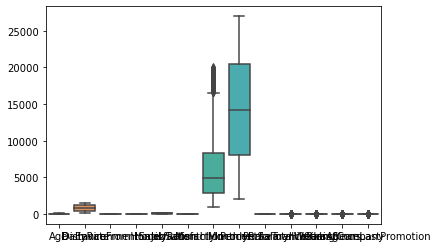

In [49]:
sns.boxplot(data = data)

### Removing Outliers By Using Winsorizing Technique

In [50]:
def outliers(data):
    a = data.select_dtypes(include = [np.number]).columns.tolist()
    for i in a:
        q1 = data[i].quantile(0.25)
        q3 = data[i].quantile(0.75)
        iqr = q3 - q1
        upper_limit = q3+1.5*iqr
        lower_limit = q1-1.5*iqr
        data[i] = np.where(data[i]>upper_limit,upper_limit,data[i])
        data[i] = np.where(data[i]<lower_limit,lower_limit,data[i])

In [51]:
outliers(data)

<AxesSubplot:>

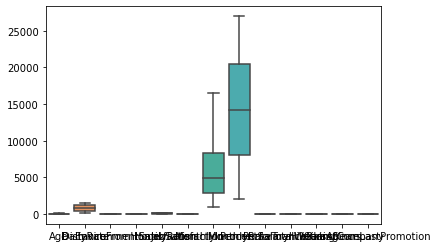

In [52]:
sns.boxplot(data = data)

In [53]:
data.Attrition.value_counts(dropna=False)

No     1233
Yes     237
Name: Attrition, dtype: int64

In [54]:
((1233)/1470)*100

83.87755102040816

#### 83.87 % Employees are not leaving the company or not leaving the organization.

# Step 4 : Data Visualization

#### Bad Rate Analysis

In [55]:
data.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [56]:
((237/1470)*100)

16.122448979591837

#### 16.12 %  Employees are leaving the company or leaving the organization for any reason.

In [57]:
import plotly.express as px

fig = px.pie(data,names='Attrition',color='Attrition',
             color_discrete_map={'Yes':'red',
                                 'No':'green'})
fig.show()

## Reject Employee data = Bad Employee

In [58]:
data_Yes= data[data["Attrition"] == "Yes"] 

data_Yes

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion
0,41.0,Yes,Travel_Rarely,1102.0,Sales,1.0,Life Sciences,2.0,Female,94.0,...,4.0,Single,5993.0,19479.0,Yes,11.0,3.0,8.0,6.0,0.0
2,37.0,Yes,Travel_Rarely,1373.0,Research & Development,2.0,Other,4.0,Male,92.0,...,3.0,Single,2090.0,2396.0,Yes,15.0,3.0,7.0,0.0,0.0
14,28.0,Yes,Travel_Rarely,103.0,Research & Development,24.0,Life Sciences,3.0,Male,50.0,...,3.0,Single,2028.0,12947.0,Yes,14.0,3.0,6.0,4.0,0.0
21,36.0,Yes,Travel_Rarely,1218.0,Sales,9.0,Life Sciences,3.0,Male,82.0,...,1.0,Single,3407.0,6986.0,No,23.0,3.0,10.0,5.0,0.0
24,34.0,Yes,Travel_Rarely,699.0,Research & Development,6.0,Medical,2.0,Male,83.0,...,1.0,Single,2960.0,17102.0,No,11.0,3.0,8.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23.0,Yes,Travel_Frequently,638.0,Sales,9.0,Marketing,4.0,Male,33.0,...,1.0,Married,1790.0,26956.0,No,19.0,3.0,1.0,1.0,1.0
1442,29.0,Yes,Travel_Rarely,1092.0,Research & Development,1.0,Medical,1.0,Male,36.0,...,4.0,Married,4787.0,26124.0,Yes,14.0,3.0,4.0,2.0,2.0
1444,56.0,Yes,Travel_Rarely,310.0,Research & Development,7.0,Technical Degree,4.0,Male,72.0,...,3.0,Married,2339.0,3666.0,No,11.0,3.0,14.0,10.0,7.5
1452,50.0,Yes,Travel_Frequently,878.0,Sales,1.0,Life Sciences,2.0,Male,94.0,...,3.0,Divorced,6728.0,14255.0,No,12.0,3.0,12.0,6.0,0.0


In [59]:
fig = px.sunburst(data_Yes, path=["Gender",'Department','EducationField',
                                    'Attrition','BusinessTravel'])
fig.show()

# Step 5 : Breaking Data into Two Parts
* Quantitative Variable
* Qualitative Variable

In [60]:
data.select_dtypes(include=[np.number]).columns.tolist()

['Age',
 'DailyRate',
 'DistanceFromHome',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'PercentSalaryHike',
 'PerformanceRating',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsSinceLastPromotion']

In [61]:
Quantitative_Variable = data[data.select_dtypes(include=[np.number]).columns.tolist()]
Quantitative_Variable.head(3)

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobSatisfaction,MonthlyIncome,MonthlyRate,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion
0,41.0,1102.0,1.0,2.0,94.0,4.0,5993.0,19479.0,11.0,3.0,8.0,6.0,0.0
1,49.0,279.0,8.0,3.0,61.0,2.0,5130.0,24907.0,23.0,3.0,10.0,10.0,1.0
2,37.0,1373.0,2.0,4.0,92.0,3.0,2090.0,2396.0,15.0,3.0,7.0,0.0,0.0


In [62]:
Qualitative_Variable = data[data.select_dtypes(include=['object']).columns.tolist()]
Qualitative_Variable.head(3)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes


## Converting qualitative Variable into number

In [63]:
from sklearn.preprocessing import LabelEncoder
Qualitative_Variable=Qualitative_Variable.apply(LabelEncoder().fit_transform) # label in ascending order
Qualitative_Variable.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,1,2,2,1,0,7,2,1
1,0,1,1,1,1,6,1,0
2,1,2,1,4,1,2,2,1
3,0,1,1,1,0,6,1,1
4,0,2,1,3,1,2,1,0


## Combining the data set

In [64]:
Final_combined = pd.concat([Qualitative_Variable, Quantitative_Variable],axis=1)
Final_combined.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Age,DailyRate,...,EnvironmentSatisfaction,HourlyRate,JobSatisfaction,MonthlyIncome,MonthlyRate,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion
0,1,2,2,1,0,7,2,1,41.0,1102.0,...,2.0,94.0,4.0,5993.0,19479.0,11.0,3.0,8.0,6.0,0.0
1,0,1,1,1,1,6,1,0,49.0,279.0,...,3.0,61.0,2.0,5130.0,24907.0,23.0,3.0,10.0,10.0,1.0
2,1,2,1,4,1,2,2,1,37.0,1373.0,...,4.0,92.0,3.0,2090.0,2396.0,15.0,3.0,7.0,0.0,0.0
3,0,1,1,1,0,6,1,1,33.0,1392.0,...,4.0,56.0,3.0,2909.0,23159.0,11.0,3.0,8.0,8.0,3.0
4,0,2,1,3,1,2,1,0,27.0,591.0,...,1.0,40.0,2.0,3468.0,16632.0,12.0,3.0,6.0,2.0,2.0


# Step 6 : Data Partition

In [65]:
from sklearn.model_selection import train_test_split

x = Final_combined.drop('Attrition', axis = 1)
y = Final_combined[['Attrition']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=100)

# Step 7 : Model building

In [66]:
from sklearn import tree

dt = tree.DecisionTreeClassifier()

dt.fit(X_train,y_train)  

DecisionTreeClassifier()

# Step 8: Plotting the Tree

In [67]:
train=pd.concat([y_train,X_train],axis=1)
train.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Age,DailyRate,...,EnvironmentSatisfaction,HourlyRate,JobSatisfaction,MonthlyIncome,MonthlyRate,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion
1361,0,1,1,4,1,2,1,0,26.0,1096.0,...,3.0,61.0,4.0,2544.0,7102.0,18.0,3.0,8.0,7.0,7.0
610,0,2,1,5,1,5,0,1,27.0,269.0,...,3.0,42.0,4.0,12808.0,8842.0,16.0,3.0,9.0,9.0,0.0
542,0,2,1,1,0,4,2,1,38.0,168.0,...,3.0,81.0,3.0,7861.0,15397.0,14.0,3.0,10.0,1.0,0.0
950,0,0,2,1,0,7,0,1,31.0,587.0,...,4.0,57.0,3.0,9852.0,8935.0,19.0,3.0,10.0,10.0,7.5
344,0,2,1,5,1,4,2,0,35.0,1296.0,...,3.0,62.0,2.0,8095.0,18264.0,13.0,3.0,17.0,16.0,0.0


In [68]:
independent_variable = list(train.columns[1:])
independent_variable

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime',
 'Age',
 'DailyRate',
 'DistanceFromHome',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'PercentSalaryHike',
 'PerformanceRating',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsSinceLastPromotion']

# Plotting The Tree

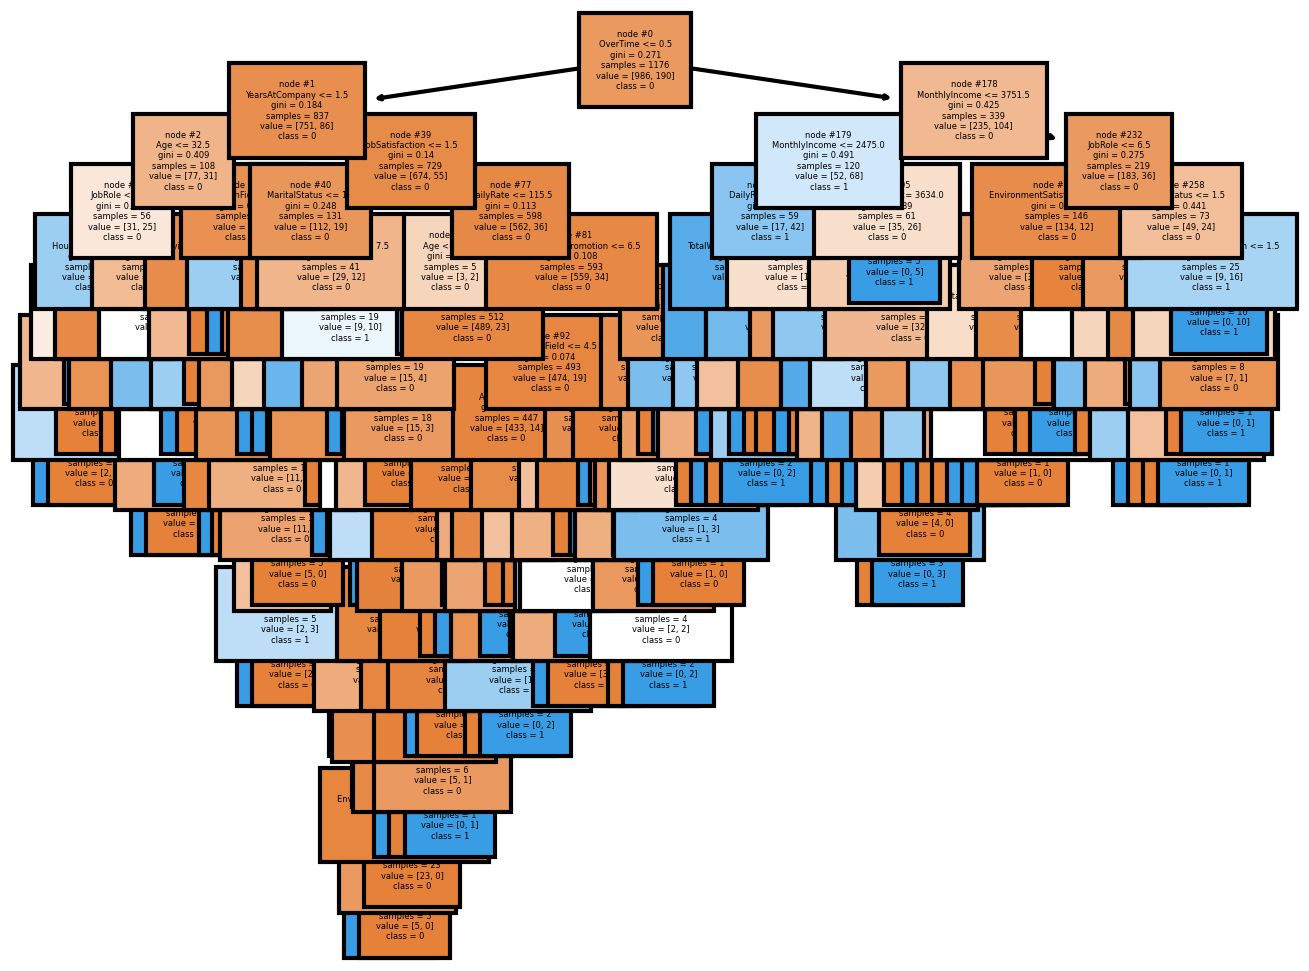

In [69]:
from sklearn import tree
import matplotlib.pyplot as plt

Attrition=['0', '1']  
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = independent_variable, 
               class_names=Attrition,
               filled = True, 
              node_ids=True, 
              fontsize=2);

# Step 9 : Predictions on Train Dataset

In [70]:
train.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Age,DailyRate,...,EnvironmentSatisfaction,HourlyRate,JobSatisfaction,MonthlyIncome,MonthlyRate,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion
1361,0,1,1,4,1,2,1,0,26.0,1096.0,...,3.0,61.0,4.0,2544.0,7102.0,18.0,3.0,8.0,7.0,7.0
610,0,2,1,5,1,5,0,1,27.0,269.0,...,3.0,42.0,4.0,12808.0,8842.0,16.0,3.0,9.0,9.0,0.0
542,0,2,1,1,0,4,2,1,38.0,168.0,...,3.0,81.0,3.0,7861.0,15397.0,14.0,3.0,10.0,1.0,0.0
950,0,0,2,1,0,7,0,1,31.0,587.0,...,4.0,57.0,3.0,9852.0,8935.0,19.0,3.0,10.0,10.0,7.5
344,0,2,1,5,1,4,2,0,35.0,1296.0,...,3.0,62.0,2.0,8095.0,18264.0,13.0,3.0,17.0,16.0,0.0


In [71]:
train['Predicted']=dt.predict(X_train) 
train.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Age,DailyRate,...,HourlyRate,JobSatisfaction,MonthlyIncome,MonthlyRate,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,Predicted
1361,0,1,1,4,1,2,1,0,26.0,1096.0,...,61.0,4.0,2544.0,7102.0,18.0,3.0,8.0,7.0,7.0,0
610,0,2,1,5,1,5,0,1,27.0,269.0,...,42.0,4.0,12808.0,8842.0,16.0,3.0,9.0,9.0,0.0,0
542,0,2,1,1,0,4,2,1,38.0,168.0,...,81.0,3.0,7861.0,15397.0,14.0,3.0,10.0,1.0,0.0,0
950,0,0,2,1,0,7,0,1,31.0,587.0,...,57.0,3.0,9852.0,8935.0,19.0,3.0,10.0,10.0,7.5,0
344,0,2,1,5,1,4,2,0,35.0,1296.0,...,62.0,2.0,8095.0,18264.0,13.0,3.0,17.0,16.0,0.0,0


# Step 10 : Model Performance Metrics

In [72]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['Attrition'])
print(matrix)

[[986   0]
 [  0 190]]


### Final accuracy of Model Before Pruning

In [73]:
from sklearn.metrics import classification_report
print(classification_report(train['Attrition'], train['Predicted']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       986
           1       1.00      1.00      1.00       190

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176



### Model Improvement by Pruning Method ( Cut Tree)

In [74]:
from sklearn import tree

dt = tree.DecisionTreeClassifier(criterion='gini',
                                 min_samples_leaf=50, 
                                 min_samples_split=100, 
                                 max_depth=3)  

dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=50, min_samples_split=100)

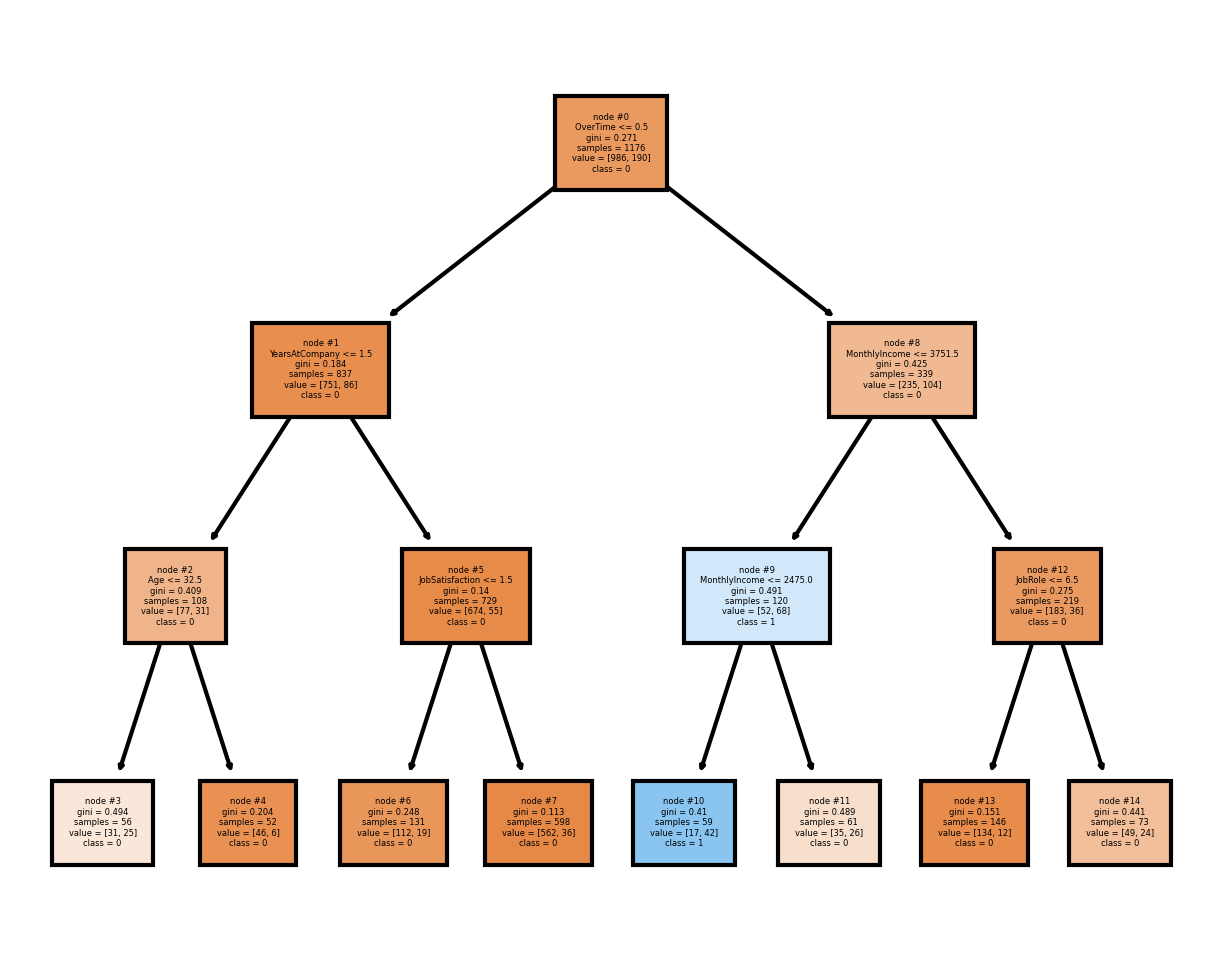

In [75]:
from sklearn import tree
import matplotlib.pyplot as plt

churn=['0', '1']  
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  
               feature_names = independent_variable,
               class_names=churn,
               filled = True, 
              node_ids=True,
              fontsize=2);

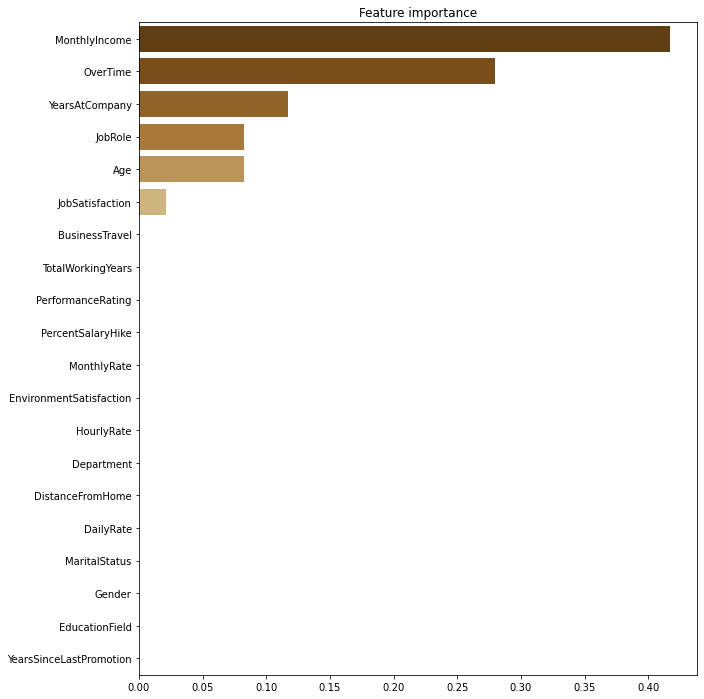

In [87]:
imp = pd.Series(data=dt.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="BrBG", orient='h')

## Strategy & Prediction

In [76]:
train['Predicted']=dt.predict(X_train)
train.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Age,DailyRate,...,HourlyRate,JobSatisfaction,MonthlyIncome,MonthlyRate,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,Predicted
1361,0,1,1,4,1,2,1,0,26.0,1096.0,...,61.0,4.0,2544.0,7102.0,18.0,3.0,8.0,7.0,7.0,0
610,0,2,1,5,1,5,0,1,27.0,269.0,...,42.0,4.0,12808.0,8842.0,16.0,3.0,9.0,9.0,0.0,0
542,0,2,1,1,0,4,2,1,38.0,168.0,...,81.0,3.0,7861.0,15397.0,14.0,3.0,10.0,1.0,0.0,0
950,0,0,2,1,0,7,0,1,31.0,587.0,...,57.0,3.0,9852.0,8935.0,19.0,3.0,10.0,10.0,7.5,0
344,0,2,1,5,1,4,2,0,35.0,1296.0,...,62.0,2.0,8095.0,18264.0,13.0,3.0,17.0,16.0,0.0,0


### Final accuracy of Model after Pruning

In [77]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['Attrition'])
print(matrix)

[[969 148]
 [ 17  42]]


In [78]:
from sklearn.metrics import classification_report
print(classification_report(train['Attrition'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       986
           1       0.71      0.22      0.34       190

    accuracy                           0.86      1176
   macro avg       0.79      0.60      0.63      1176
weighted avg       0.84      0.86      0.83      1176



### The Accuracy On Train Data After Pruning Is 86%.

# Step 11 : Predictions on Test Dataset

In [79]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Age,DailyRate,DistanceFromHome,...,HourlyRate,JobSatisfaction,MonthlyIncome,MonthlyRate,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,Attrition
880,1,1,4,0,2,1,0,32.0,116.0,13.0,...,77.0,2.0,2743.0,7331.0,20.0,3.0,2.0,2.0,2.0,0
152,2,2,2,1,8,1,1,53.0,1436.0,6.0,...,34.0,3.0,2306.0,16047.0,20.0,3.0,13.0,7.0,4.0,0
1466,2,1,3,1,0,1,0,39.0,613.0,6.0,...,42.0,1.0,9991.0,21457.0,15.0,3.0,9.0,7.0,1.0,0
1084,2,2,5,1,7,1,1,34.0,971.0,1.0,...,64.0,3.0,7083.0,12288.0,14.0,3.0,10.0,10.0,7.5,0
1086,1,1,3,1,5,2,1,50.0,333.0,22.0,...,88.0,4.0,14411.0,24450.0,13.0,3.0,28.5,18.0,7.5,0


In [80]:
test['Predicted']=dt.predict(X_test)
test.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Age,DailyRate,DistanceFromHome,...,JobSatisfaction,MonthlyIncome,MonthlyRate,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,Attrition,Predicted
880,1,1,4,0,2,1,0,32.0,116.0,13.0,...,2.0,2743.0,7331.0,20.0,3.0,2.0,2.0,2.0,0,0
152,2,2,2,1,8,1,1,53.0,1436.0,6.0,...,3.0,2306.0,16047.0,20.0,3.0,13.0,7.0,4.0,0,1
1466,2,1,3,1,0,1,0,39.0,613.0,6.0,...,1.0,9991.0,21457.0,15.0,3.0,9.0,7.0,1.0,0,0
1084,2,2,5,1,7,1,1,34.0,971.0,1.0,...,3.0,7083.0,12288.0,14.0,3.0,10.0,10.0,7.5,0,0
1086,1,1,3,1,5,2,1,50.0,333.0,22.0,...,4.0,14411.0,24450.0,13.0,3.0,28.5,18.0,7.5,0,0


# Step 12 : Model Performance Metrics on Test data

In [81]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['Attrition'])
print(confusion_matrix)

[[243  41]
 [  4   6]]


In [82]:
from sklearn.metrics import classification_report
print(classification_report(test['Attrition'], test['Predicted']))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       247
           1       0.60      0.13      0.21        47

    accuracy                           0.85       294
   macro avg       0.73      0.56      0.56       294
weighted avg       0.81      0.85      0.80       294



### The Accuracy On Test Data After Pruning Is 85%. So We Can Say That Our Model Is Good Fit.

# Grid Search Method (For Selecting Best Combination)

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = { 'min_samples_split': [100, 200,270], 
           'min_samples_leaf': [50,70,80],  
           'max_depth':[3,4,6]} 
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              params, 
                              verbose=1, 
                              cv=10)
grid_search_cv.fit(X_train, y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 6],
                         'min_samples_leaf': [50, 70, 80],
                         'min_samples_split': [100, 200, 270]},
             verbose=1)

In [84]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=50, min_samples_split=100,
                       random_state=42)

# Finish...!